In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
a = """4
390
9
580
10
650
14
730
4
410
7
530
12
600
22
790
1
350
3
400
8
590
11
640
5
450
6
520
10
690
11
690
16
770
13
700
13
730
10
640"""

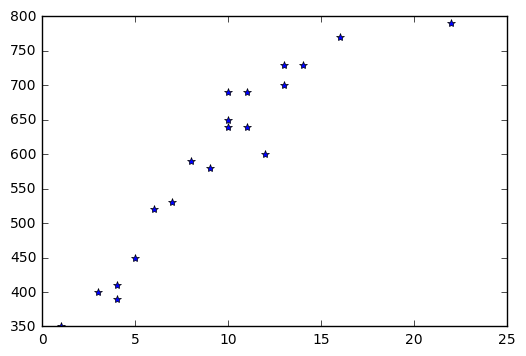

In [4]:
d = a.split('\n')
x = d[0::2]
y = d[1::2]
X = np.zeros((len(x), 1))
y = np.zeros((len(y),))

for ix in range(len(x)):
    X[ix, :] = int(x[ix])
    y[ix] = int(d[1::2][ix])

plt.plot(X[:, 0], y, '*')

In [5]:
print y.shape,X[:,0].shape

(20,) (20,)


In [6]:
def predict(X,params):
    y_pred=[]
    for ix in X:
        y_pred.append((ix*params).sum())
    return np.array(y_pred)


In [7]:
def loss(y_true,y_pred):
    return ((y_true-y_pred)**2).sum()

In [8]:
def cal_dl(x,y,params,alpha):
    y_pred=predict(x,params)
    dl=[]
    for ix in range(params.shape[0]):
        err=0.0
        for iy in range(x.shape[0]):
            err=err+(y_pred[iy]-y[iy])*x[iy,ix]
        err=float(err)/y_pred.shape[0]
        dl.append(err)
    return np.array(dl)

In [9]:
def update(x,y,params,alpha):
    dl=cal_dl(x,y,params,alpha)
    for ic in range(params.shape[0]):
        params[ic]=params[ic]-alpha*dl[ic]
    return params    

In [10]:
def line(x,y,epochs=10,alpha=0.01):
    xx=np.ones((x.shape[0],2))
    xx[:,1]=x
    params=np.zeros(xx.shape[1])+0.1
    loss_history=[]
    for i in range(epochs):
        params=update(xx,y,params,alpha)
        loss_history.append(loss(y,predict(xx,params)))
    return predict(xx,params),params,loss_history


In [18]:
a,b,c=line(X[:,0],y,epochs=1000)

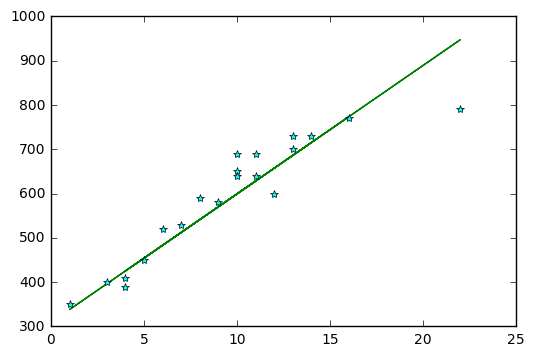

In [19]:
plt.plot(X[:,0],a,color='green')
plt.plot(X[:, 0], y, '*',color='cyan')

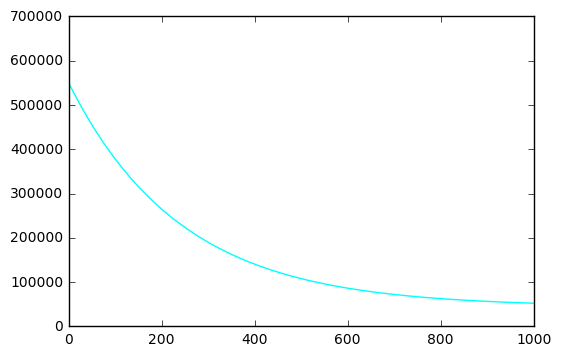

In [20]:
plt.plot(c,color='cyan')